In [1]:
import pandas as pd
import numpy as np

In [2]:
#A cleaned version Brazil MST data (only for 2005)
data = pd.read_stata('C:/Users/user/Desktop/Advanced Data Analysis with Python 9.9.22/Datasets/Brazil MST data 2005.dta')
data.columns

Index(['ibgecode', 'state', 'latitude', 'longitude', 'invasions_count',
       'reforms_count', 'invasions_count_cum', 'invasions_dum', 'log_income',
       'ln_agriculturalproductivity', 'codigo', 'PT_voteshare',
       'infantmortality', 'BF_coverage1000', 'log_invasions_count_cum',
       'log_intended_lands1995'],
      dtype='object')

In [3]:
data

,ibgecode,state,latitude,longitude,invasions_count,reforms_count,invasions_count_cum,invasions_dum,log_income,ln_agriculturalproductivity,codigo,PT_voteshare,infantmortality,BF_coverage1000,log_invasions_count_cum,log_intended_lands1995
0,1100015,RO,-11.944,-61.907,0.0,0.0,1.0,0.0,5.704232,4.058813,110001,0.143244,23.508137,70.383179,0.693147,12.880941
1,1100023,RO,-9.913,-63.041,4.0,0.0,9.0,1.0,6.048920,4.563440,110002,0.084352,13.881177,46.206680,2.302585,12.876694
2,1100031,RO,-13.498,-60.554,0.0,0.0,0.0,0.0,5.670812,4.332453,110003,0.238043,0.000000,13.717052,0.000000,12.372421
3,1100049,RO,-11.438,-61.448,0.0,0.0,1.0,0.0,6.012553,4.106792,110004,0.175060,16.358463,78.762436,0.693147,12.665471
4,1100056,RO,-13.189,-60.812,0.0,0.0,1.0,0.0,5.941381,4.385105,110005,0.295203,19.801981,72.037315,0.693147,13.052385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,5222005,GO,-16.742,-48.516,0.0,0.0,0.0,0.0,6.217075,4.480215,522200,0.116532,36.269428,3.071108,0.000000,11.895869
5594,5222054,GO,-17.735,-49.806,0.0,0.0,0.0,0.0,6.141865,NaN,522205,0.015775,18.181818,37.521141,0.000000,11.844603
5595,5222203,GO,-15.038,-47.059,0.0,0.0,1.0,0.0,5.546036,4.487371,522220,0.020011,0.000000,71.208298,0.693147,12.212556
5596,5222302,GO,-15.457,-48.889,0.0,0.0,5.0,0.0,5.495630,4.494347,522230,0.019916,18.518518,22.953484,1.791759,NaN


<AxesSubplot:xlabel='invasions_count_cum', ylabel='BF_coverage1000'>

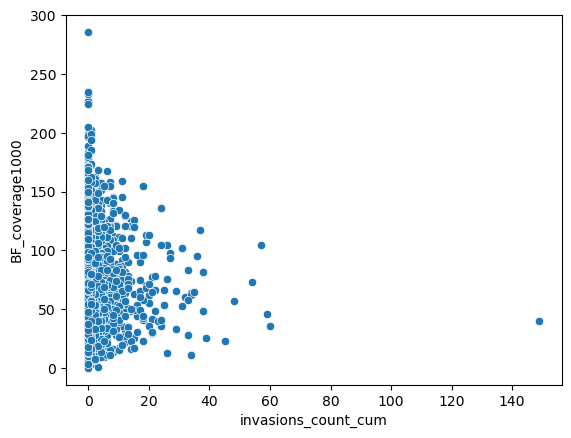

In [4]:
import seaborn as sns
sns.scatterplot(x="invasions_count_cum", y="BF_coverage1000", data=data)

<AxesSubplot:xlabel='invasions_count', ylabel='BF_coverage1000'>

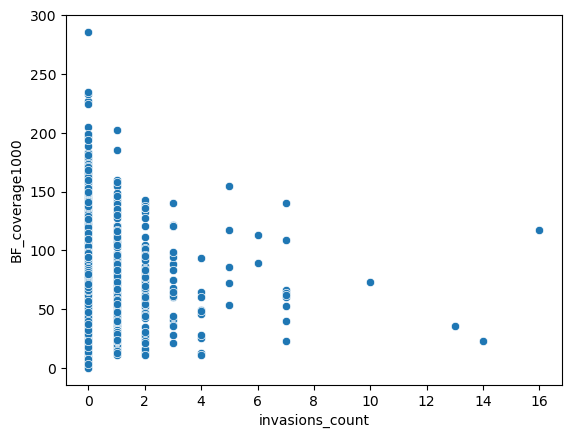

In [5]:
sns.scatterplot(x="invasions_count", y="BF_coverage1000", data=data)

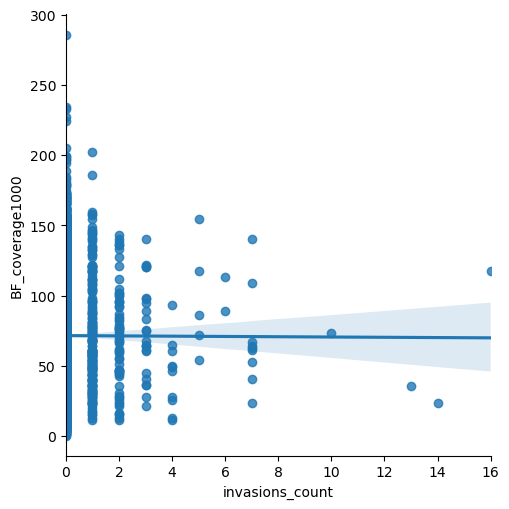

In [6]:
sns.lmplot(x="invasions_count", y="BF_coverage1000", data=data)

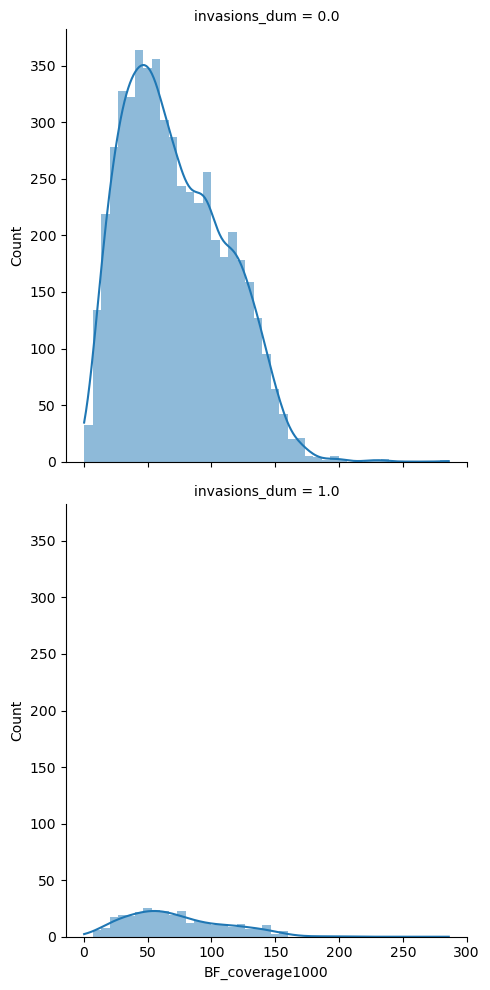

In [7]:
sns.displot(x='BF_coverage1000', row='invasions_dum', data=data, linewidth=0, kde=True)

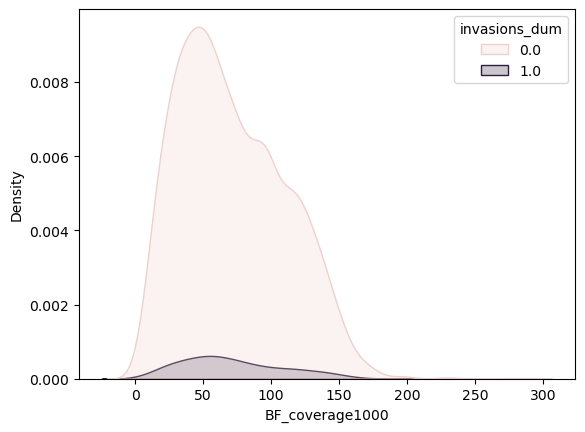

In [8]:
sns.kdeplot(x='BF_coverage1000', hue='invasions_dum', data=data, shade=True);

In [9]:
#Frequency
data.groupby('invasions_count')['invasions_count'].count()

invasions_count
0.0     5252
1.0      199
2.0       63
3.0       24
4.0       10
5.0        5
6.0        2
7.0        9
10.0       1
13.0       1
14.0       1
16.0       1
Name: invasions_count, dtype: int64

### IV2SLS model

In [ ]:
#pip install statsmodels

In [10]:
data = data.dropna(axis=0)

In [11]:
import statsmodels.api as sm

y = data['BF_coverage1000']
X = data['log_invasions_count_cum']
Z = data['log_intended_lands1995']

#### What if we run OLS?

In [12]:
OLS =  sm.OLS(y, X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        BF_coverage1000   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.160
Method:                 Least Squares   F-statistic:                              938.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                   8.52e-189
Time:                        08:46:35   Log-Likelihood:                         -28106.
No. Observations:                4917   AIC:                                  5.621e+04
Df Residuals:                    4916   BIC:                                  5.622e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
log_invasions_count_cum    39.8106      1.299     30.636      0.000      37.263      42.358
==============================================================================
Omnibus:                       27.819   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.660
Skew:                          -0.130   Prob(JB):                     1.33e-07
Kurtosis:                       3.296   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IV2SLS by hand

In [13]:
first_stage = sm.OLS(X, Z).fit()
predicted_X = first_stage.predict(Z)

second_stage = sm.OLS(y, predicted_X).fit()
second_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        BF_coverage1000   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                          1.617e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        08:50:16   Log-Likelihood:                         -24956.
No. Observations:                4917   AIC:                                  4.991e+04
Df Residuals:                    4916   BIC:                                  4.992e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           185.3464      1.458    127.152      0.000     182.489     188.204
==============================================================================
Omnibus:                      264.132   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.221
Skew:                           0.514   Prob(JB):                     8.47e-57
Kurtosis:                       2.549   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
first_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     log_invasions_count_cum   R-squared (uncentered):                   0.221
Model:                                 OLS   Adj. R-squared (uncentered):              0.221
Method:                      Least Squares   F-statistic:                              1392.
Date:                     Thu, 08 Dec 2022   Prob (F-statistic):                   1.69e-268
Time:                             08:51:20   Log-Likelihood:                         -5307.6
No. Observations:                     4917   AIC:                                  1.062e+04
Df Residuals:                         4916   BIC:                                  1.062e+04
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
log_intended_lands1995     0.0322      0.001     37.310      0.000       0.031       0.034
==============================================================================
Omnibus:                     2047.312   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7555.781
Skew:                           2.127   Prob(JB):                         0.00
Kurtosis:                       7.334   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#pip install linearmodels

#### Use already existing libraries

In [15]:
from statsmodels.sandbox.regression.gmm import IV2SLS

In [16]:
iv2sls = IV2SLS(data['BF_coverage1000'], data['log_invasions_count_cum'], data['log_intended_lands1995']).fit()

In [17]:
iv2sls.params

log_invasions_count_cum    185.346405
dtype: float32

In [ ]:
import linearmodels

In [18]:
from linearmodels.iv import IV2SLS

In [19]:
formula = 'BF_coverage1000 ~ [log_invasions_count_cum ~ log_intended_lands1995]'
iv2sls = IV2SLS.from_formula(formula, data).fit()

In [20]:
def parse(model, exog="log_invasions_count_cum"):
    param = model.params[exog]
    se = model.std_errors[exog]
    p_val = model.pvalues[exog]
    print(f"Parameter: {param}")
    print(f"SE: {se}")
    print(f"95 CI: {(-1.96*se,1.96*se) + param}")
    print(f"P-value: {p_val}")
    
parse(iv2sls)

Parameter: 185.34640990236835
SE: 5.322609007611222
95 CI: [174.91409625 195.77872356]
P-value: 0.0


In [21]:
iv2sls

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:        BF_coverage1000   R-squared:                     -1.9822
Estimator:                    IV-2SLS   Adj. R-squared:                -1.9828
No. Observations:                4917   F-statistic:                    1212.6
Date:                Thu, Dec 08 2022   P-value (F-stat)                0.0000
Time:                        08:56:30   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                                    Parameter Estimates                                    
===========================================================================================
                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------
log_invasions_count_cum     185.35     5.3226     34.822     0.0000      174.91      195.78
===========================================================================================

Endogenous: log_invasions_count_cum
Instruments: log_intended_lands1995
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x282888369a0

In [22]:
formula = 'BF_coverage1000 ~ 1 + log_income + ln_agriculturalproductivity + PT_voteshare + infantmortality + [log_invasions_count_cum ~ log_intended_lands1995]'
iv2sls = IV2SLS.from_formula(formula, data).fit()

In [23]:
iv2sls

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:        BF_coverage1000   R-squared:                      0.5526
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5521
No. Observations:                4917   F-statistic:                    5649.1
Date:                Thu, Dec 08 2022   P-value (F-stat)                0.0000
Time:                        08:57:23   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                      Parameter Estimates                                      
===============================================================================================
                             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------
Intercept                       409.06     5.4618     74.896     0.0000      398.36      419.77
PT_voteshare                   -14.384     4.1160    -3.4946     0.0005     -22.451     -6.3165
infantmortality                -0.0094     0.0280    -0.3344     0.7381     -0.0642      0.0455
ln_agriculturalproductivity    -6.1430     0.4897    -12.545     0.0000     -7.1028     -5.1833
log_income                     -54.553     1.0467    -52.120     0.0000     -56.604     -52.501
log_invasions_count_cum        -7.0446     1.7782    -3.9617     0.0001     -10.530     -3.5594
===============================================================================================

Endogenous: log_invasions_count_cum
Instruments: log_intended_lands1995
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x282865d89a0